In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

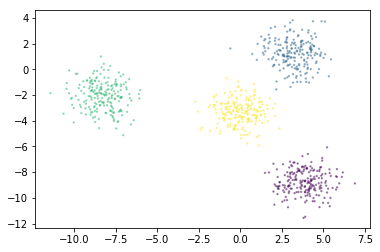

In [2]:
#
# Input data
#

# generate random points, 800 samples, 3 centers
from sklearn.datasets import make_blobs
data, labels = make_blobs(n_features=2, n_samples=800, centers=4, random_state=500)

# plot data
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.4, s=2)
plt.show()

In [3]:
#
# TensorFlow model
#
input_features = data.shape[1]
output_features = len(set(labels))

x = tf.placeholder(tf.float32, shape=(None, input_features), name='input')
y = tf.placeholder(tf.uint8, name='correct_output')

# converter from label to one hot vector (e.g: 0 => [1, 0, 0]; 2 => [0, 0, 1])
y_hot = tf.one_hot(y, output_features)

# weights and bias
w = tf.Variable(tf.random_uniform( (input_features, output_features) ))
b = tf.Variable(tf.random_uniform( (1, output_features) ))
output = tf.add(tf.matmul(x, w), b)

# converter from one hot vector to labels (e.g: [1, 0, 0] => 0; [0, 0, 1] => 2)
output_labels = tf.argmax(output, axis=1)

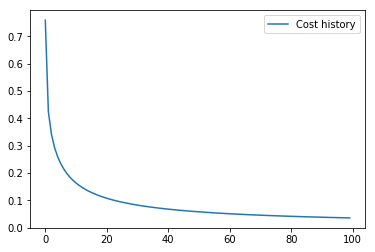

In [4]:
# cost function
cost = tf.losses.softmax_cross_entropy(y_hot, output)

# gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

# run training session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(1000):
    sess.run(optimizer, feed_dict={x:data, y:labels})
    if epoch % 10 == 0:
        cost_history.append( sess.run(cost, feed_dict={x:data, y:labels}) )

predicted_labels = sess.run(output_labels, feed_dict={x:data, y:labels})
plt.plot(cost_history, label='Cost history')
plt.legend()
plt.show()


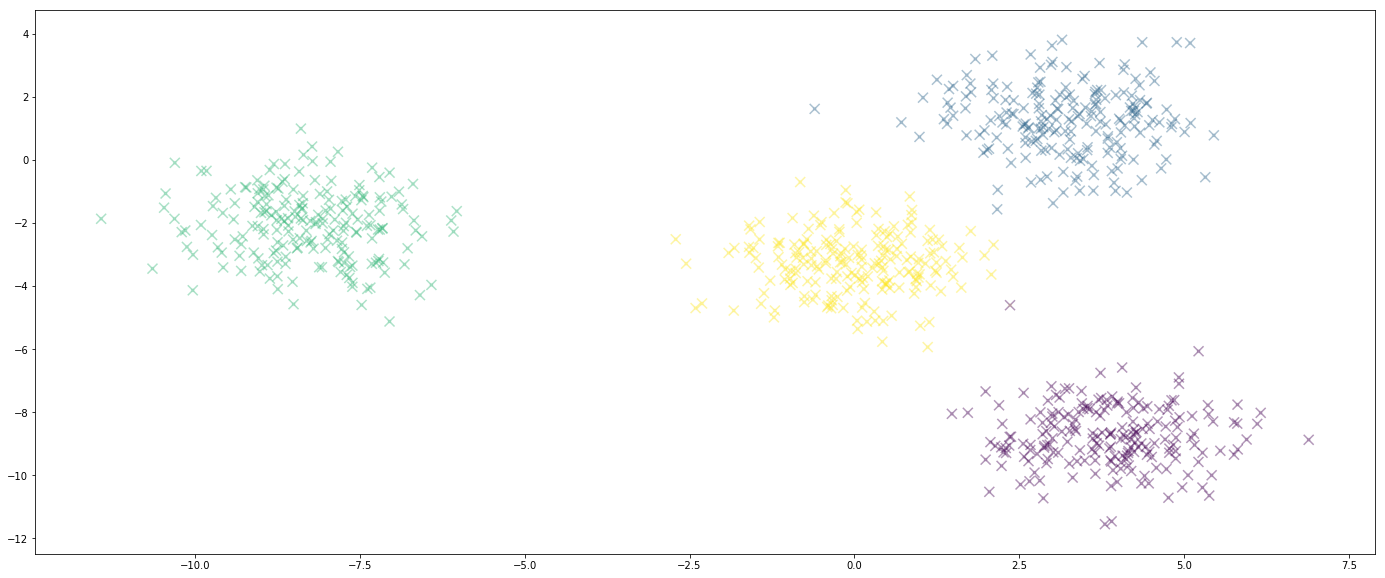

In [5]:
# plot results
plt.rcParams['figure.figsize'] = (24, 10)
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.1, s=10)
plt.scatter(data[:,0], data[:,1], c=predicted_labels, marker='x', alpha=0.4, s=100)
plt.show();